<a href="https://colab.research.google.com/github/ayami-n/YOLO/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
cv2.__version__

'4.1.2'

access to my drive (make YOLO_custom file)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/drive


git clone (setting up Git UPL)

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet/' '/content/gdrive/MyDrive/YOLO_Custom/darknet'

fatal: destination path '/content/drive/MyDrive/YOLO_Custom/darknet' already exists and is not an empty directory.


change the location from YOLO_custom to darknet

In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom/darknet

/content/drive/MyDrive/YOLO_Custom/darknet


Training the config File


*   set batch size to 64
*   set subdivisions to 12
*   max_batches to 2000* number of classes(number of cloumns)
*   stps to 80% and 90% of max batches
*   change num_classes in all YOLO layers(number of cloumns) [YOLO]*3
*   change filters in all of the YOLO layers(filters=(num_classes + 5)x3)

In [ ]:
!make

chmod +x *.sh


In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom

/content/drive/MyDrive/YOLO_Custom


roboflow -> dataset -> download -> copy URL ->paste 

In [ ]:
!curl -L "https://public.roboflow.com/ds/LWDGqJiE3S?key=N2A6YKGVlI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

make data file

In [ ]:
%mkdir data

make train, test, valid 

In [ ]:
%cp train/_darknet.labels data/obj.names # create files for learning, make sure correct location and create data folder for each custome detection
%mkdir data/obj # if data folder is not empty, make new data1, data2 and so on and change the folder names
#copy image and labels
%cp train/*.jpg data/obj/
%cp valid/*.jpg data/obj/

%cp train/*.txt data/obj/
%cp valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir('train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir('valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

mkdir: cannot create directory ‘data/obj’: File exists


change the location

In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom/darknet

/content/drive/MyDrive/YOLO_Custom/darknet


make custom_weight file
downlaod yolov4.conv.137

In [ ]:
%mkdir custom_weight

mkdir: cannot create directory ‘custom_weight’: File exists


change the data makefile(GPU=1, CUDNN=1,OPENCV=1) recompiled

In [ ]:
!make

chmod +x *.sh


In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom

/content/drive/MyDrive/YOLO_Custom


In [ ]:
%mkdir backup

mkdir: cannot create directory ‘backup’: File exists


access permissions  

In [ ]:
 !chmod +x darknet/darknet # if the location is different try !chmod +x darknet/darknet

Training dataset

In [ ]:
!darknet/darknet detector train data/obj.data darknet/cfg/yolov4-custom1.cfg darknet/custom_weight/yolov4.conv.137 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 206875, rewritten_bbox = 0.022236 % 

 453: 2.858341, 2.221086 avg loss, 0.000042 rate, 2.071745 seconds, 27180 images, 1.652308 hours left
Loaded: 0.000062 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000073, iou_loss = 0.000000, total_loss = 0.000073 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.437080), count: 4, class_loss = 0.765658, iou_loss = 0.096859, total_loss = 0.862517 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.464685), count: 12, class_loss = 1.198562, iou_loss = 0.059623, total_loss = 1.258184 
 total_bbox = 206891, rewritten_bbox = 0.022234 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000077, iou_loss = 0.000000, total_loss = 0.000077 
v3 (iou loss, Normalizer: (iou: 0.07, obj:

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

#write train file (just the image list)
  import os

  with open('data/train.txt', 'w') as out:
    for img in [f for f in os.listdir('train') if f.endswith('jpg')]:
      out.write('data/obj/' + img + '\n')

  #write the valid file (just the image list)
  import os

  with open('data/valid.txt', 'w') as out:
    for img in [f for f in os.listdir('valid') if f.endswith('jpg')]:
      out.write('data/obj/' + img + '\n')

In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom

/content/drive/MyDrive/YOLO_Custom


In [ ]:
#check if weigths have saved yet
#backup houses the last weights for our detector
#(file yolo-obj_last.weights will be saved to the build\darknet\x64\backup\ for each 100 iterations)
#(file yolo-obj_xxxx.weights will be saved to the build\darknet\x64\backup\ for each 1000 iterations)
#After training is complete - get result yolo-obj_final.weights from path build\darknet\x64\bac
!ls backup
#if it is empty you haven't trained for long enough yet, you need to train for at least 100 iterations

yolov4-custom1_last.weights


In [ ]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

In [ ]:
%cp data/obj.data data/coco.data

In [ ]:
!chmod +x darknet/darknet # if the location is different try !chmod +x darknet/darknet

chmod: cannot access 'darknet/darknet': Not a directory


In [ ]:
# need to set our custom cfg to test mode 
%cd /content/drive/MyDrive/YOLO_Custom/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom1.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom1.cfg


/content/drive/MyDrive/YOLO_Custom/darknet/cfg
/content/drive/My Drive/YOLO_Custom/darknet


In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom

/content/drive/MyDrive/YOLO_Custom


test has images that we can teat our detector on

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 12, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

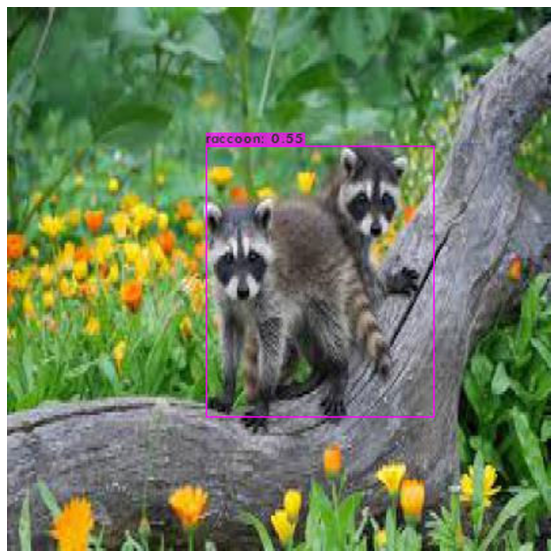

In [ ]:
import os
#/test has images that we can test our detector on
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = 'test/' + random.choice(test_images);

#test out our detector!
!darknet/darknet detector test data/obj.data darknet/cfg/yolov4-custom1.cfg  backup/yolov4-custom1_last.weights {img_path} -dont-show
imShow('/content/gdrive/MyDrive/YOLO_Custom/predictions.jpg')
